In [1]:
import requests

In [2]:
import pandas as pd

In [3]:
%%capture
!pip install geopandas

In [4]:
import geopandas

In [5]:
kungsholmen_kitchens = {
    "Curb Kungsholmen": "curb-kungsholmen",
    "Macka Kungsholmen": "macka-kungsholmen",
    "Kebab Kungsholmen": "kebab-kungsholmen",
    "El Burro Burrito Kungsholmen": "el-burro-kungsholmen",
    "Italian Sin Pizza Kungsholmen": "italian-sin-kungsholmen",
    "Bah-Gawk! Wings Kungsholmen": "bah-gawk-wings-kungsholmen",
    "Birria Taco & Quesadilla Kungsholmen": "birria-taco-quesadilla",
    "Candie Salad Kungsholmen": "candie-kungsholmen",
    "India Street Kungsholmen": "streety-indian-kungsholmen",
    "Wrap It Kungsholmen": "wrap-it-kungsholmen"
}



In [6]:
uppsala_kitchens = {    
    "Curb Uppsala": "curb-uppsala",
    "Bah-Gawk! Wings Uppsala": "bah-gawk-wings-uppsala",
    "Birra Taco & Quesadilla Uppsala": "birra-taco-quesadilla-uppsala",
    "Italian Sin Pizza Uppsala": "italian-sin-pizza-upsala",
    "Kebab Uppsala": "kebab-uppsala",
    "Macka Uppsala": "macka-uppsala",
    "Candie Uppsala": "candie-uppsala",
    "India Street Uppsala": "streety-indian-uppsala"
    }

In [7]:
arsta_kitchens = {
    "Curb Årsta": "curb-rsta",
    "Macka Årsta": "macka-rsta",
    "Kebab Årsta": "kebab-rsta",
    "Birria Taco & Quesadilla Årsta": "birria-taco-quesadilla-rsta",
    "Wrap It Årsta": "wrap-it-rsta",
    "Candie Salad Årsta": "candie-salad-rsta",
    "India Street Årsta": "streety-indian-rsta",
    "Italian Sin Pizza Årsta": "italian-sin-pizza-rsta",
    "Bah-Gawk! Wings Årsta": "bah-gawk-wings-rsta"
}

In [8]:
# iterables = [kitchens.keys(), ["L1", "L2"]]
# index = pd.MultiIndex.from_product(iterables)

In [9]:
kungsholmen_kitchens_polygon_coordinates = pd.DataFrame(columns=kungsholmen_kitchens.keys())

uppsala_kitchens_polygon_coordinates = pd.DataFrame(columns=uppsala_kitchens.keys())

arsta_kitchens_polygon_coordinates = pd.DataFrame(columns=arsta_kitchens.keys())

In [10]:
# print(kungsholmen_kitchens_polygon_coordinates)
# print(uppsala_kitchens_polygon_coordinates)
# print(arsta_kitchens_polygon_coordinates)

In [11]:
def scrape_coordinates(kitchen):
  URL = f"https://restaurant-api.wolt.com/v3/venues/slug/{kitchen}"

  response = requests.get(url=URL)
  scraped_data = response.json()
  coordinates = scraped_data["results"][0]["delivery_specs"]["geo_range"]["coordinates"][0]

  return coordinates

In [12]:
# len(scrape_coordinates("candie-kungsholmen"))

In [13]:
for kitchen, kitchen_polygon_coordinates  in [(kungsholmen_kitchens, kungsholmen_kitchens_polygon_coordinates), \
                                              (uppsala_kitchens, uppsala_kitchens_polygon_coordinates), \
                                              (arsta_kitchens, arsta_kitchens_polygon_coordinates)]:
  for k in kitchen:
    kitchen_polygon_coordinates[k] = scrape_coordinates(kitchen[k])

In [14]:
# kungsholmen_kitchens_polygon_coordinates

In [15]:
# uppsala_kitchens_polygon_coordinates

In [16]:
# arsta_kitchens_polygon_coordinates

##Visualization

In [17]:
from shapely.geometry import Point, Polygon, LineString, GeometryCollection

In [18]:
import numpy as np

In [19]:
import geopandas as gpd

In [20]:
kungsholmen_poly = Polygon(kungsholmen_kitchens_polygon_coordinates["Kebab Kungsholmen"])

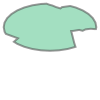

In [21]:
kungsholmen_poly

In [22]:
arsta_poly = Polygon(arsta_kitchens_polygon_coordinates["Kebab Årsta"])

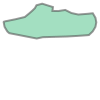

In [23]:
arsta_poly

In [24]:
uppsala_poly = Polygon(uppsala_kitchens_polygon_coordinates["Kebab Uppsala"])

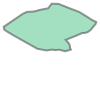

In [25]:
uppsala_poly

## Load the geo-encoded address

In [26]:
import pickle

data_1 = pickle.load(open("/content/drive/MyDrive/Curb Food/address_geocoded_additional.pkl", "rb"))
data_2 = pickle.load(open("/content/drive/MyDrive/Curb Food/address_geocoded.pkl", "rb"))
data_3 = pickle.load(open("/content/drive/MyDrive/Curb Food/address_geocoded_helsingborgs.pkl", "rb"))

data = data_1 + data_2 + data_3
df_mapper = pd.DataFrame(data)


df_mapper = df_mapper.dropna(subset=["location"])
df_mapper["point"] = df_mapper["location"].apply(lambda loc: tuple(loc.point) if loc else None)
df_mapper[['latitude', 'longitude', 'altitude']] = pd.DataFrame(df_mapper['point'].tolist(), index=df_mapper.index)

df_mapper.head()

,address,location,point,latitude,longitude,altitude
2,"Tidagränd 26 , 128 43 , Bagarmossen, SE","(Tidagränd, Bagarmossen, Skarpnäcks stadsdelso...","(59.2713083, 18.1365033, 0.0)",59.271308,18.136503,0.0
15,"Drottningholmsvägen 308 , 167 31 , Bromma, SE","(308, Drottningholmsvägen, Ulvsunda, Bromma st...","(59.3368639, 17.9564002, 0.0)",59.336864,17.956400,0.0
16,"Drottningholmsvägen 306 , 167 31 , Bromma, SE","(306, Drottningholmsvägen, Ulvsunda, Bromma st...","(59.3369841, 17.9564832, 0.0)",59.336984,17.956483,0.0
17,"Drottningholmsvägen 298 , 167 31 , Bromma, SE","(298, Drottningholmsvägen, Ulvsunda, Bromma st...","(59.3367403, 17.9577341, 0.0)",59.336740,17.957734,0.0
18,"Drottningholmsvägen 274 , 167 31 , Bromma, SE","(274, Drottningholmsvägen, Ulvsunda, Bromma st...","(59.33565, 17.9626171, 0.0)",59.335650,17.962617,0.0


In [27]:
df_mapper.shape

(144452, 6)

In [28]:
# type(df_mapper["location"].iloc[0])

## Load population data

In [29]:
df_stockholm = pd.read_json("/content/drive/MyDrive/Curb Food/stockholm.jl", lines=True)
df_solna = pd.read_json("/content/drive/MyDrive/Curb Food/solna_danderyds_sollentuna_taby.jl", lines=True)
df_uppsala = pd.read_json("/content/drive/MyDrive/Curb Food/uppsala.jl", lines=True)
df_helsingborg = pd.read_json("/content/drive/MyDrive/Curb Food/helsingborgs.jl", lines=True)

In [30]:
print("Stockholm shape:", df_stockholm.shape)
print("Solna shape:", df_solna.shape)
print("Uppsala shape:", df_uppsala.shape)
print("Helsingborg shape:", df_helsingborg.shape)

Stockholm shape: (796269, 8)
Solna shape: (211147, 8)
Uppsala shape: (191982, 8)
Helsingborg shape: (120452, 8)


In [31]:
df = pd.concat([df_stockholm, df_solna, df_uppsala, df_helsingborg])

In [32]:
df.shape

(1319850, 8)

In [33]:
df.head()

,name,age,sex,marriage,address,city,postnumber,url
0,James Timm,48,None,None,Tidagränd 32,Bagarmossen,128 44,/19730325-Michael_James_Timm_Bagarmossen/DP-Cj...
1,Eva Rogström Timm,47,Kvinna,None,Tidagränd 32,Bagarmossen,128 44,/19740717-Eva_Karolina_Rogstrom_Timm_Bagarmoss...
2,Martin Holsten Hagnell,60,None,None,Tidagränd 30,Bagarmossen,128 44,/19610221-Martin_Andreas_Holsten_Hagnell_Bagar...
3,Eva Söderberg,60,Kvinna,None,Tidagränd 30,Bagarmossen,128 44,/19601108-Eva_Birgitta_Soderberg_Bagarmossen/1...
4,Margareta Hagnell,19,Kvinna,Ej gift,Tidagränd 30,Bagarmossen,128 44,/20020628-Sofia_Margareta_Hagnell_Bagarmossen/...


## Clean and enrich the data

In [34]:
# df[(df["address"].str.lower().str.contains("lgh"))]

In [35]:
df["is_apartment"] = (df["address"].str.lower().str.contains("lgh"))

In [36]:
df[["street", "apartment"]] = df["address"].str.split("lgh", expand=True)
df["formatted_address"] = df["street"] + " , " + df["postnumber"] + " , " + df["city"]  + ", SE"  

## Merging

In [37]:
df_merged = df.merge(df_mapper, left_on="formatted_address", right_on="address", how="left")

In [38]:
df_merged.shape

(1319850, 18)

In [39]:
# 778936/1199398

In [40]:
# 888393/1319850

In [41]:
print("% of missing data i.e. missing geocodes :", df_merged["point"].isna().sum()/df_merged.shape[0]*100)

% of missing data i.e. missing geocodes : 32.68985111944539


In [42]:
df_merged = df_merged.dropna(subset=["point"])

In [43]:
df_merged.shape

(888393, 18)

In [44]:
df_merged = geopandas.GeoDataFrame(df_merged, 
                             geometry=geopandas.points_from_xy(df_merged.longitude, df_merged.latitude))

In [45]:
df_merged.shape

(888393, 19)

In [46]:
print(kungsholmen_poly)

POLYGON ((17.93271715029998 59.32138842585422, 17.930288194717345 59.3254554359804, 17.928571833274795 59.33422674222236, 17.930243539219077 59.3430003136345, 17.935241613783102 59.35143885971286, 17.94337614555177 59.35921772599728, 17.95433597815554 59.36603742583491, 17.967700445428914 59.37163523305625, 17.982955457522188 59.37579537735369, 17.999513332482447 59.37835743543827, 18.010372357257857 59.378902928616455, 18.015715625628133 59.37686194208291, 18.021338909191314 59.375390997723855, 18.027827291650226 59.37261074562011, 18.03659450522133 59.36995822517861, 18.039582324888983 59.372356126380765, 18.055124784027445 59.3745384607546, 18.06577075457109 59.37163523305625, 18.079135221844464 59.36603742583491, 18.090095054448234 59.35921772599728, 18.098229586216902 59.35143885971286, 18.103227660780927 59.3430003136345, 18.104899366725206 59.33422674222236, 18.10418367636976 59.33056927292341, 18.1007632207791 59.33061102321466, 18.094102601276887 59.3311855541495, 18.084324734

In [47]:
df_merged["within_kungsholmen"] = df_merged["geometry"].within(kungsholmen_poly)
df_merged["within_uppsala"] = df_merged["geometry"].within(uppsala_poly)
df_merged["within_arsta"] = df_merged["geometry"].within(arsta_poly)

In [48]:
print("Kungsholmen Population :", df_merged["within_kungsholmen"].sum())
print("Uppsala Population :", df_merged["within_uppsala"].sum())
print("Arsta Population :", df_merged["within_arsta"].sum())
print("Total Population :", df_merged["within_kungsholmen"].sum()+df_merged["within_uppsala"].sum()+df_merged["within_arsta"].sum())

Kungsholmen Population : 277151
Uppsala Population : 76421
Arsta Population : 230293
Total Population : 583865


In [49]:
583865/888393

0.6572147686890825

In [50]:
query = """
SELECT  
location, 
ROUND(COUNT(DISTINCT order_id)/COUNT(DISTINCT DATE(order_timestamp)),2) as average_daily_orders 
FROM `curbfood-data-platform.dashboards.deliverect_orders_all` 
WHERE DATE(order_timestamp) >= '2022-03-01' 
AND location IN ("Kungsholmen", "Uppsala", "Årsta")
AND channel = 'WOLT'
GROUP BY 1 
"""

In [51]:
project_id = 'curbfood-data-platform'

orders_data = pd.io.gbq.read_gbq(query, project_id=project_id)

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=725825577420-unm2gnkiprugilg743tkbig250f4sfsj.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fbigquery&state=YAnkQIYgbV65AKfUzWYzhJ73YxTEA9&prompt=consent&access_type=offline
Enter the authorization code: 4/1AX4XfWjtyKWVx5dh0yweqb5tXMRhwGazyjUPrSJoazJ8TIjqTrGE-DwvlcY


In [52]:
orders_data.set_index("location", inplace=True)

In [53]:
orders_data[["population", "area"]] = 0

In [54]:
orders_data

,average_daily_orders,population,area
location,,,
Årsta,31.61,0,0
Kungsholmen,50.50,0,0
Uppsala,14.27,0,0


In [55]:
orders_data.loc["Kungsholmen", "population"] = df_merged["within_kungsholmen"].sum()
orders_data.loc["Uppsala", "population"] = df_merged["within_uppsala"].sum()
orders_data.loc["Årsta", "population"] = df_merged["within_arsta"].sum()

In [56]:
orders_data.loc["Kungsholmen", "area"] = kungsholmen_poly.area
orders_data.loc["Uppsala", "area"] = uppsala_poly.area
orders_data.loc["Årsta", "area"] = arsta_poly.area

In [57]:
orders_data.reset_index(inplace=True)

In [58]:
orders_data

,location,average_daily_orders,population,area
0,Årsta,31.61,230293,0.014816
1,Kungsholmen,50.50,277151,0.011084
2,Uppsala,14.27,76421,0.008720


In [59]:
query2 = """
SELECT  \
DATE(order_timestamp) as date, location, \
COUNT(DISTINCT order_id) as daily_orders \
FROM `curbfood-data-platform.dashboards.deliverect_orders_all` \
WHERE DATE(order_timestamp) >= '2022-03-01' \
AND location IN ('Kungsholmen', 'Uppsala', 'Årsta') \
AND channel = 'WOLT' \
GROUP BY 1, 2 \
"""

In [60]:
project_id = 'curbfood-data-platform'

location_daily_data = pd.io.gbq.read_gbq(query2, project_id=project_id)

In [61]:
location_daily_data

,date,location,daily_orders
0,2022-03-28,Årsta,40
1,2022-03-28,Kungsholmen,74
2,2022-04-12,Kungsholmen,51
3,2022-03-08,Uppsala,8
4,2022-03-03,Kungsholmen,39
...,...,...,...
163,2022-03-07,Uppsala,11
164,2022-04-20,Årsta,5
165,2022-04-19,Årsta,4
166,2022-03-16,Uppsala,6


In [62]:
%%capture
!pip install plotly==5.7.0

In [63]:
import plotly.express as px

fig = px.scatter(orders_data, x="average_daily_orders", y="population",
	         size="area", hover_name="location", size_max=60, trendline="ols")
fig.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [64]:
#@title
fig = px.box(location_daily_data.sort_values("location"), x="daily_orders", y="location")
# fig.update_xaxes(range=[10, 60])
fig.show()

In [65]:
orders_data.corr()

,average_daily_orders,population,area
average_daily_orders,1.000000,0.948195,0.361763
population,0.948195,1.000000,0.639194
area,0.361763,0.639194,1.000000
